In [ ]:
import pandas as pd
import numpy as np
np.dtypes = np.dtype
np.object = object
np.int = int
np.float = float
np.bool = bool

Load and view the dataset

In [ ]:
df=pd.read_csv("/content/IBM.csv")
df.head(5)

,Date,Open,High,Low,Close,Volume
0,1962-01-02,1.530517,1.530517,1.513320,1.513320,407940
1,1962-01-03,1.513322,1.526550,1.513322,1.526550,305955
2,1962-01-04,1.526549,1.526549,1.510675,1.511336,274575
3,1962-01-05,1.509352,1.509352,1.478927,1.481573,384405
4,1962-01-08,1.480249,1.480249,1.441887,1.453792,572685


## **PREPROCESSING THE DATASET**

Covert the Date column to datetime and set as index

In [ ]:
df['Date']=pd.to_datetime(df["Date"])
df.set_index("Date",inplace=True)
df.sort_index(inplace=True)
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
1962-01-02,1.530517,1.530517,1.513320,1.513320,407940
1962-01-03,1.513322,1.526550,1.513322,1.526550,305955
1962-01-04,1.526549,1.526549,1.510675,1.511336,274575
1962-01-05,1.509352,1.509352,1.478927,1.481573,384405
1962-01-08,1.480249,1.480249,1.441887,1.453792,572685
1962-01-09,1.460408,1.489511,1.460408,1.470991,517770
1962-01-10,1.473636,1.480250,1.473636,1.473636,313800
1962-01-11,1.477604,1.489510,1.477604,1.489510,337335
1962-01-12,1.492156,1.502739,1.492156,1.492156,462855


Handle missing values

In [ ]:
df.ffill(inplace=True)
df.bfill(inplace=True)
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


Handle outliers using IQR method

In [ ]:
cols=['Open','High','Low','Close','Volume']
for col in cols:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  Lower_bound=Q1-1.5*IQR
  Upper_bound=Q3+1.5*IQR
  df[col]=np.where(df[col]>Upper_bound,Upper_bound,df[col])
  df[col]=np.where(df[col]<Lower_bound,Lower_bound,df[col])
  outliers = ((df[col] < Lower_bound) | (df[col] > Upper_bound)).sum()
  print(f"{col}:{outliers} values outside IQR bounds after capping")
  #Outlier count is 0 for all columns and outlier is successfully capped

Open:0 values outside IQR bounds after capping
High:0 values outside IQR bounds after capping
Low:0 values outside IQR bounds after capping
Close:0 values outside IQR bounds after capping
Volume:0 values outside IQR bounds after capping


Save the clean dataset to a new file

In [ ]:
df.to_csv("IBM_clean.csv")

Normalize the dataset (for lstm) and save the normalized dataset in new file

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),index=df.index,columns=df.columns)
df_scaled.to_csv("IBM_clean_scaled.csv")
df_scaled.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
1962-01-02,0.004623,0.004306,0.004675,0.004502,0.026807
1962-01-03,0.004513,0.004281,0.004675,0.004587,0.020106
1962-01-04,0.004598,0.004281,0.004658,0.004489,0.018043
1962-01-05,0.004488,0.004172,0.004452,0.004299,0.025261
1962-01-08,0.004301,0.003988,0.004211,0.004121,0.037634


# **Plot Stock Prices Over Time**

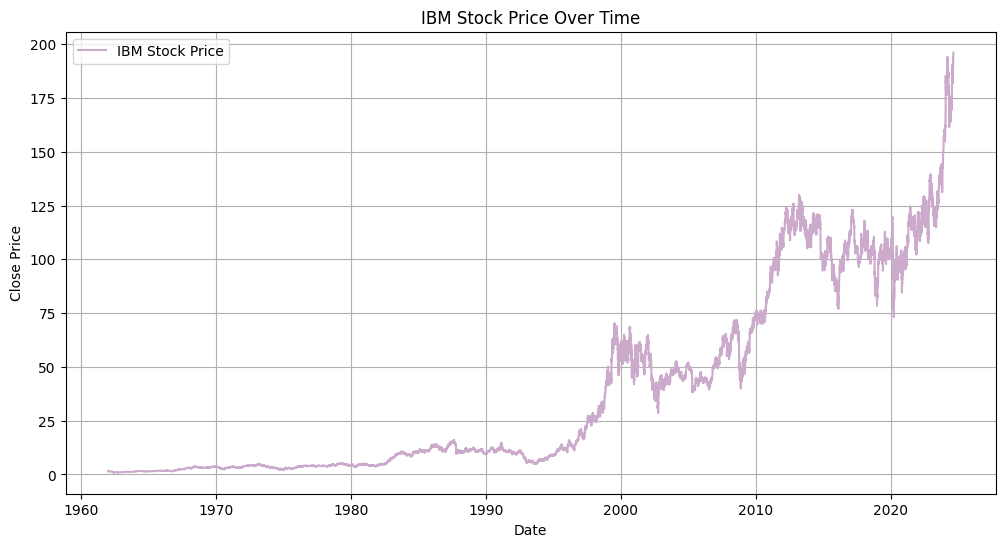

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("IBM.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='IBM Stock Price', color='#CBAACB')
plt.title("IBM Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


## **Plot Moving Averages**

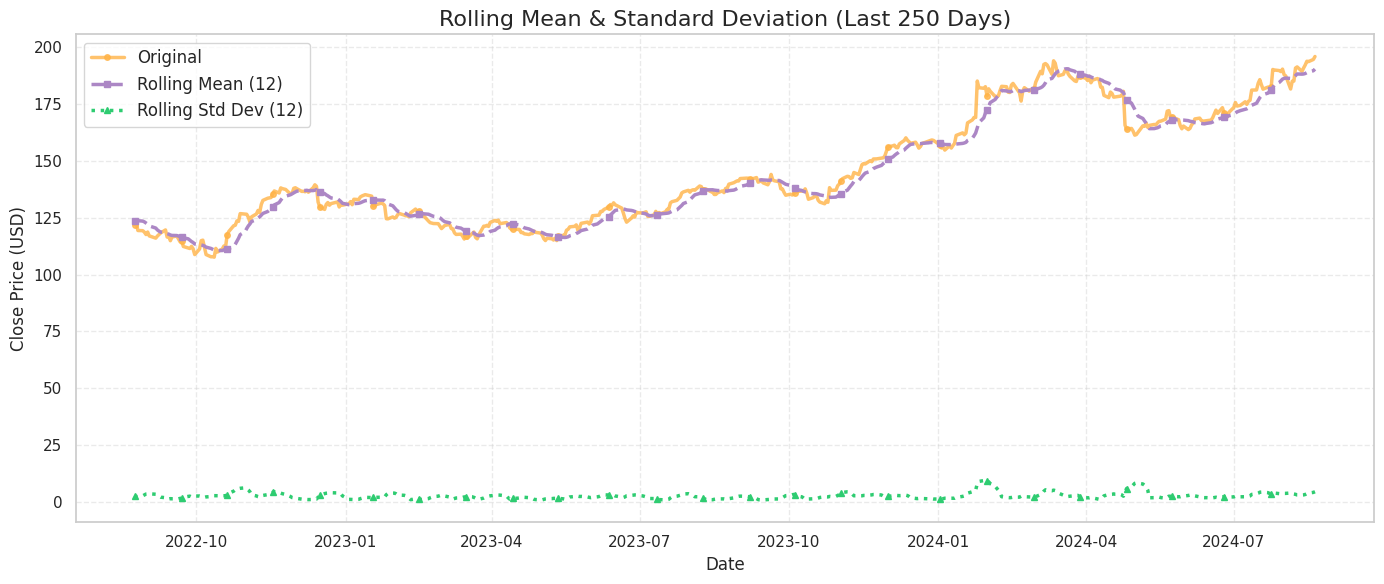

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')

# Rolling stats
rolling_mean = df['Close'].rolling(window=12).mean()
rolling_std = df['Close'].rolling(window=12).std()

# Reduced zoom
zoomed_df = df.tail(500)
zoomed_mean = rolling_mean.tail(500)
zoomed_std = rolling_std.tail(500)

# Plotting
plt.figure(figsize=(14, 6))

# Original: solid blue + circle markers
plt.plot(zoomed_df.index, zoomed_df['Close'],
         label='Original',
         color='#FFB347',
         alpha=0.8,
         linewidth=2.5,
         linestyle='-',
         marker='o',
         markevery=20,
         markersize=4)

# Rolling Mean: dashed magenta + square markers
plt.plot(zoomed_df.index, zoomed_mean,
         label='Rolling Mean (12)',
         color='#AC87C5',
         linewidth=2.5,
         linestyle='--',
         marker='s',
         markevery=20,
         markersize=4)

# Rolling Std Dev: dotted teal + triangle markers
plt.plot(zoomed_df.index, zoomed_std,
         label='Rolling Std Dev (12)',
         color='#2ECC71',
         linewidth=2.5,
         linestyle=':',
         marker='^',
         markevery=20,
         markersize=4)

# Titles and layout
plt.title('Rolling Mean & Standard Deviation (Last 250 Days)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# **Visualize Seasonality & Stationarity**

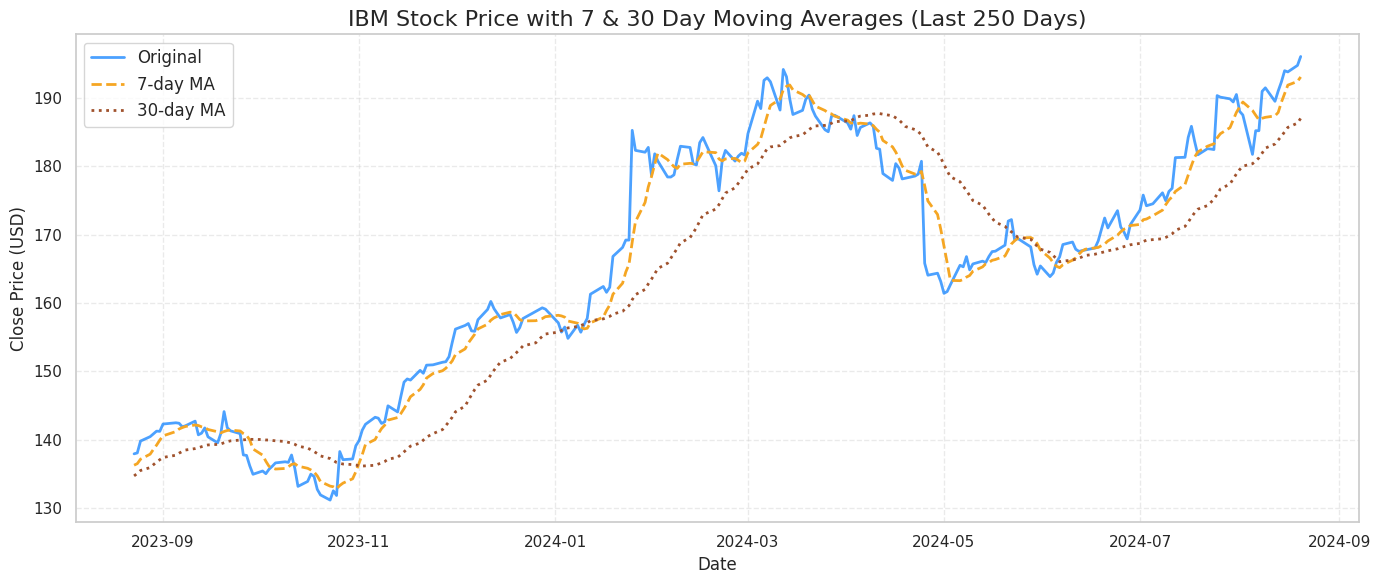

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')

# Load dataset
df = pd.read_csv("/content/IBM.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate Moving Averages
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

# Zoom into last 250 data points
zoomed_df = df.tail(250)

# Plotting
plt.figure(figsize=(14, 6))

# Original Close Price
plt.plot(zoomed_df.index, zoomed_df['Close'],
         label='Original',
         color='#007AFF',
         alpha=0.7,
         linewidth=2,
         linestyle='-')

# 7-day Moving Average
plt.plot(zoomed_df.index, zoomed_df['MA7'],
         label='7-day MA',
         color='#F5A623',
         linewidth=2,
         linestyle='--')

# 30-day Moving Average
plt.plot(zoomed_df.index, zoomed_df['MA30'],
         label='30-day MA',
         color='#A0522D',
         linewidth=2,
         linestyle=':')

# Final Plot Touches
plt.title('IBM Stock Price with 7 & 30 Day Moving Averages (Last 250 Days)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# **Plot Actual vs Predicted Stock Prices**

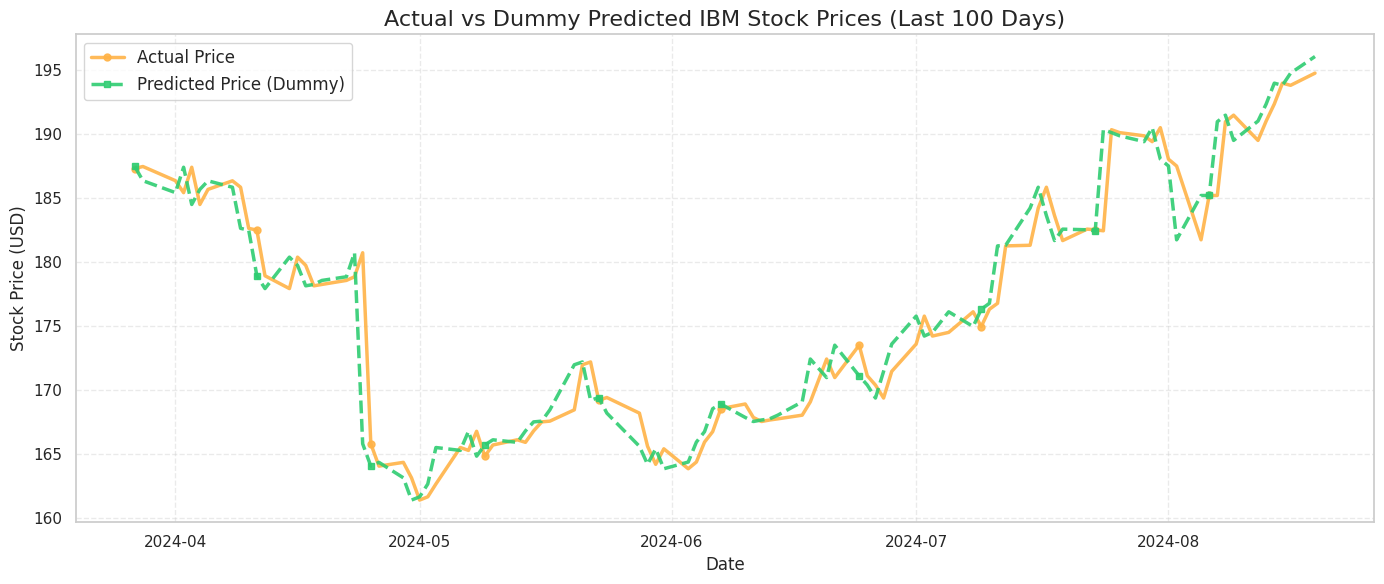

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# Load and preprocess
df = pd.read_csv("/content/IBM.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Predicted'] = df['Close'].shift(-1)
df.dropna(inplace=True)

zoomed_df = df.tail(100)

# Plot
plt.figure(figsize=(14, 6))

# Actual Price: Apricot
plt.plot(zoomed_df.index, zoomed_df['Close'],
         label='Actual Price',
         color='#FFB347',   # Apricot
         alpha=0.9,
         linewidth=2.5,
         marker='o',
         markevery=10,
         markersize=5)

# Predicted Price: Emerald
plt.plot(zoomed_df.index, zoomed_df['Predicted'],
         label='Predicted Price (Dummy)',
         color='#2ECC71',   # Emerald
         alpha=0.9,
         linewidth=2.5,
         linestyle='--',
         marker='s',
         markevery=10,
         markersize=5)

# Title and labels
plt.title("Actual vs Dummy Predicted IBM Stock Prices (Last 100 Days)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# **Importing TensorFlow or Keras**

In [ ]:
!pip install numpy==1.24.4 pandas==2.2.2 scikit-learn==1.3.2 scipy==1.13.0 ml-dtypes==0.4.0 pmdarima==2.0.4 --force-reinstall --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 983.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 204.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 289.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 242.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 157.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 185.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 290.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 321.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.

# **Install Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# **Plot the Original Time Series**

[*********************100%***********************]  1 of 1 completed


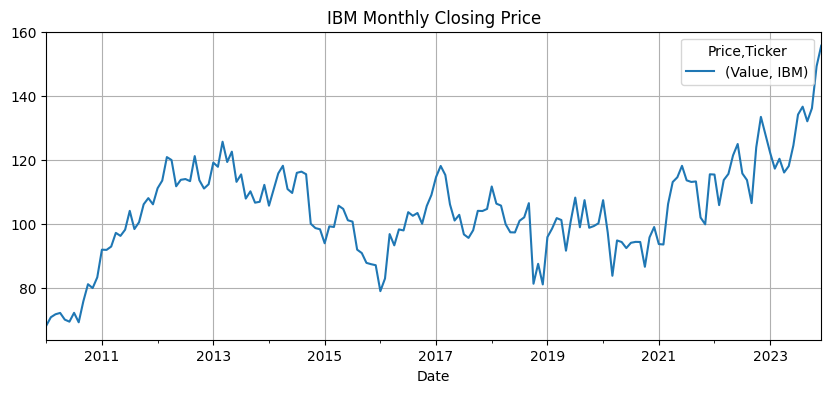

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

df = yf.download('IBM', start='2010-01-01', end='2024-01-01', interval='1mo')
df = df[['Close']].rename(columns={'Close': 'Value'})
df.index.name = 'Date'
df = df.asfreq('MS')  # Monthly Start frequency
df.head()

df.plot(title='IBM Monthly Closing Price', figsize=(10,4))
plt.grid()
plt.show()

# **ADF and KPSS Stationarity Tests**

ADF p-value: 0.21222083983929613
KPSS p-value: 0.05177091054430591


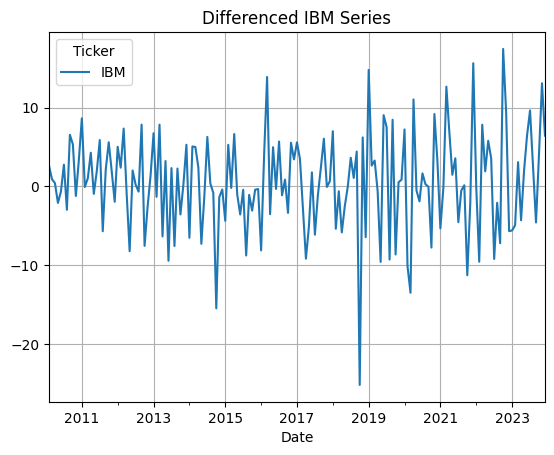

In [ ]:
result_adf = adfuller(df['Value'])
print(f'ADF p-value: {result_adf[1]}')

def kpss_test(series):
    statistic, p_value, _, _ = kpss(series, regression='c')
    print(f'KPSS p-value: {p_value}')

kpss_test(df['Value'])

# Plot differenced series if needed
df_diff = df['Value'].diff().dropna()
df_diff.plot(title='Differenced IBM Series')
plt.grid()
plt.show()

# **Fit ARIMA Model and Tune**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Basic ARIMA model
model_arima = ARIMA(df['Value'], order=(1,1,1))
result_arima = model_arima.fit()
print(result_arima.summary())

# Auto-tuned ARIMA
stepwise_model = auto_arima(df['Value'],
                            seasonal=True,
                            m=12,
                            trace=True,
                            suppress_warnings=True)
print(stepwise_model.summary())

                               SARIMAX Results                                
Dep. Variable:                    IBM   No. Observations:                  168
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -538.196
Date:                Mon, 21 Jul 2025   AIC                           1082.391
Time:                        14:07:28   BIC                           1091.745
Sample:                    01-01-2010   HQIC                          1086.188
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5241      0.339      1.547      0.122      -0.140       1.188
ma.L1         -0.6720      0.301     -2.231      0.026      -1.262      -0.082
sigma2        36.8646      3.451     10.682      0.0

## **Fit SARIMA Model**

In [ ]:
model_sarima = SARIMAX(df['Value'], order=(1,1,1), seasonal_order=(1,1,1,12))
result_sarima = model_sarima.fit()
print(result_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                IBM   No. Observations:                  168
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -511.302
Date:                            Mon, 21 Jul 2025   AIC                           1032.604
Time:                                    14:08:08   BIC                           1047.821
Sample:                                01-01-2010   HQIC                          1038.784
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5810      0.311      1.871      0.061      -0.028       1.190
ma.L1         -0.7209      0.281   

## **Forecasting Next 12 Months**

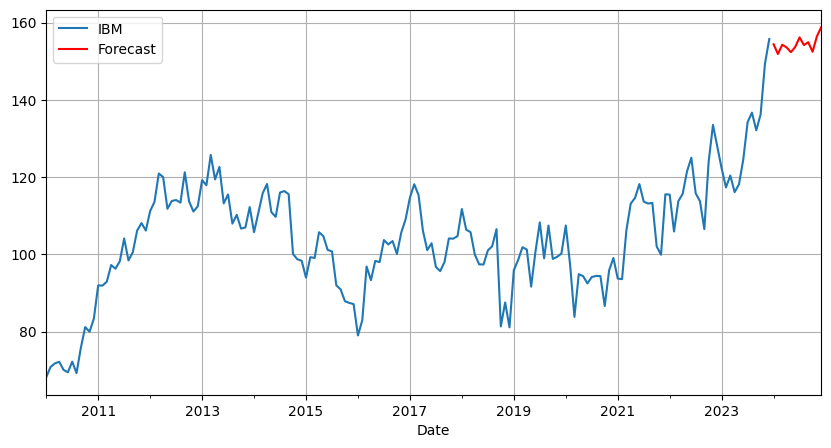

In [ ]:
forecast = result_sarima.get_forecast(steps=12)
forecast_df = forecast.conf_int()
forecast_df['Prediction'] = forecast.predicted_mean

# Fix the forecast index to start after the last date
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='MS')
forecast_df.index = forecast_index

# Plot forecast
df['Value'].plot(label='Actual', figsize=(10,5))
forecast_df['Prediction'].plot(label='Forecast', color='red')
plt.legend()
plt.grid()
plt.show()

# **Evaluate Model**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split data
train = df['Value'][:-12]
test = df['Value'][-12:]

# Fit SARIMA model
model_eval = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
fit_model = model_eval.fit()

# Generate predictions
pred = fit_model.get_prediction(start=test.index[0], end=test.index[-1])
pred_mean = pred.predicted_mean

# Evaluate predictions
rmse_sarimax = np.sqrt(mean_squared_error(test, pred_mean))
mae_sarimax = mean_absolute_error(test, pred_mean)

print(f'RMSE: {rmse_sarimax:.2f}')
print(f'MAE: {mae_sarimax:.2f}')


RMSE: 12.50
MAE: 10.68


#Preparing dataset for prophet and visualizing

In [ ]:
pip install prophet


# **Preparing dataset and plotting**

DEBUG:cmdstanpy:input tempfile: /tmp/tmptjkncwb7/031p3_ec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptjkncwb7/qab24n1u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86119', 'data', 'file=/tmp/tmptjkncwb7/031p3_ec.json', 'init=/tmp/tmptjkncwb7/qab24n1u.json', 'output', 'file=/tmp/tmptjkncwb7/prophet_modelr17j4h1f/prophet_model-20250721140906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


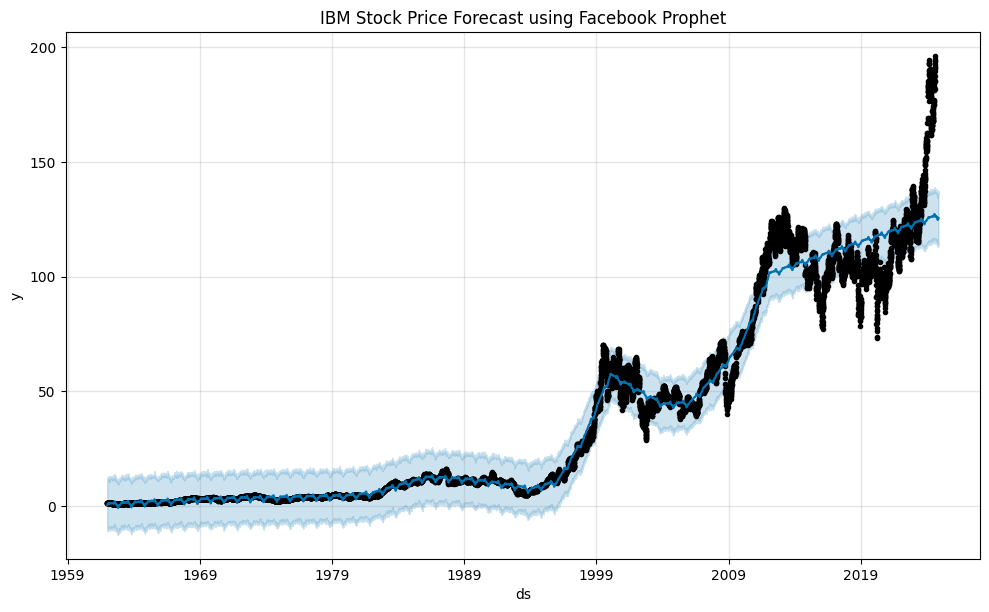

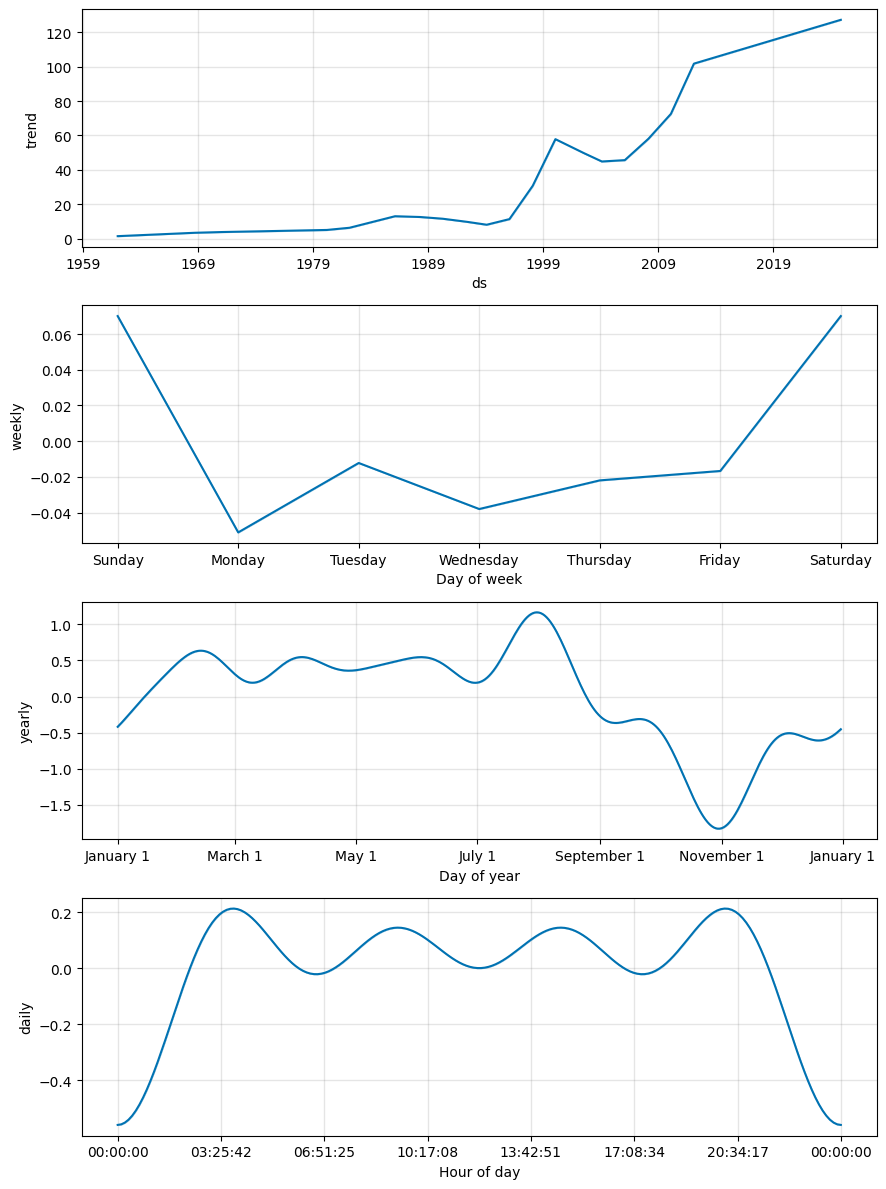

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("IBM.csv")

# Prepare data
df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

# Initialize and fit model
model = Prophet(daily_seasonality=True)
model.fit(df)

# Create future dataframe (e.g., next 90 days)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title("IBM Stock Price Forecast using Facebook Prophet")
plt.show()

# Optional: Plot forecast components
model.plot_components(forecast)
plt.show()

#**Defining Holidays(Indian) and Seasonality**


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
df = pd.read_csv("IBM.csv")

# Prepare dataset for Prophet
df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

df.head()



,ds,y
0,1962-01-02,1.513320
1,1962-01-03,1.526550
2,1962-01-04,1.511336
3,1962-01-05,1.481573
4,1962-01-08,1.453792


In [ ]:
# Define Indian holidays (you can add more dates if needed)
indian_holidays = pd.DataFrame({
    'holiday': ['diwali', 'independence_day', 'republic_day'],
    'ds': pd.to_datetime(['2020-11-14', '2020-08-15', '2020-01-26']),
    'lower_window': 0,
    'upper_window': 1
})


In [ ]:
# Initialize Prophet with changepoints and holidays
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    changepoint_prior_scale=0.3,
    holidays=indian_holidays
)

# Add monthly seasonality
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit model
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptjkncwb7/s1i3h935.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptjkncwb7/v9purg88.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65439', 'data', 'file=/tmp/tmptjkncwb7/s1i3h935.json', 'init=/tmp/tmptjkncwb7/v9purg88.json', 'output', 'file=/tmp/tmptjkncwb7/prophet_modelbq0yyu2y/prophet_model-20250721141035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#**Visualize and Showing change points**

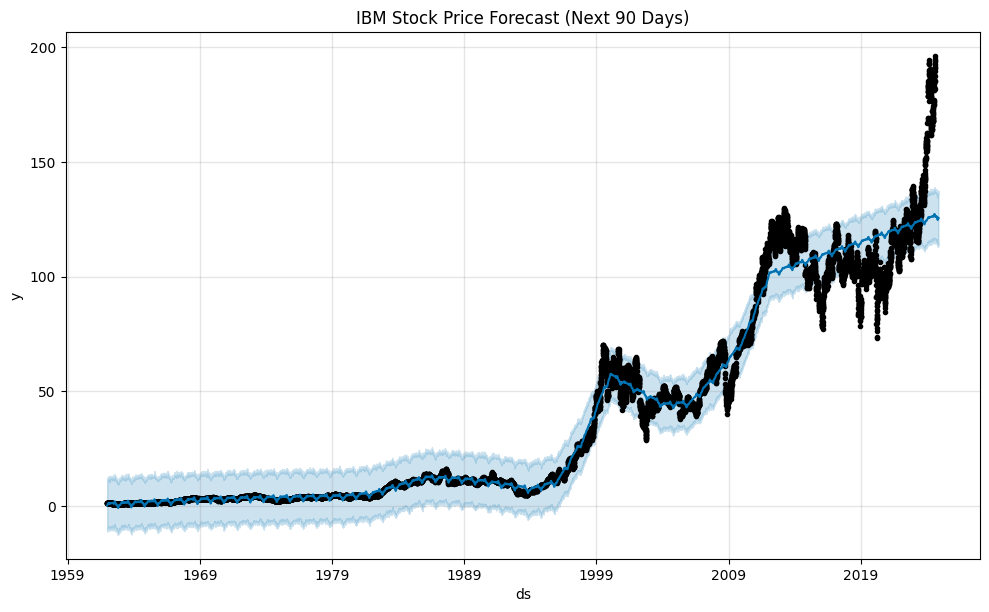

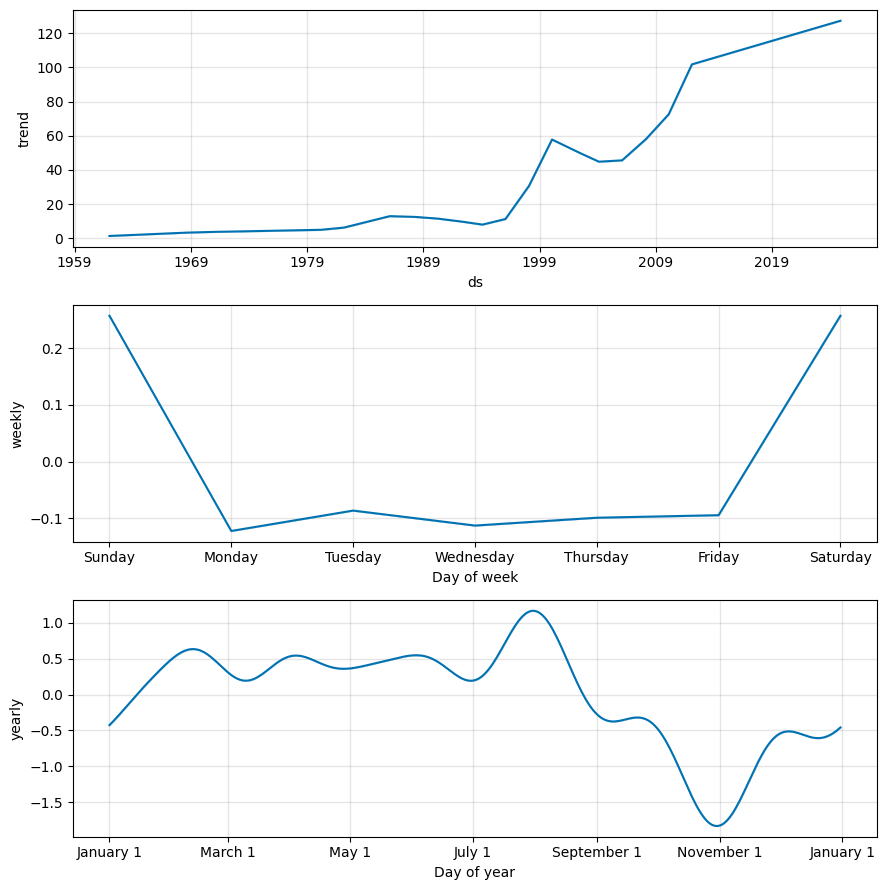

In [ ]:
# Forecast plot
fig1 = model.plot(forecast)
plt.title("IBM Stock Price Forecast (Next 90 Days)")
plt.show()

# Components plot (seasonality, trend, holidays)
fig2 = model.plot_components(forecast)
plt.show()


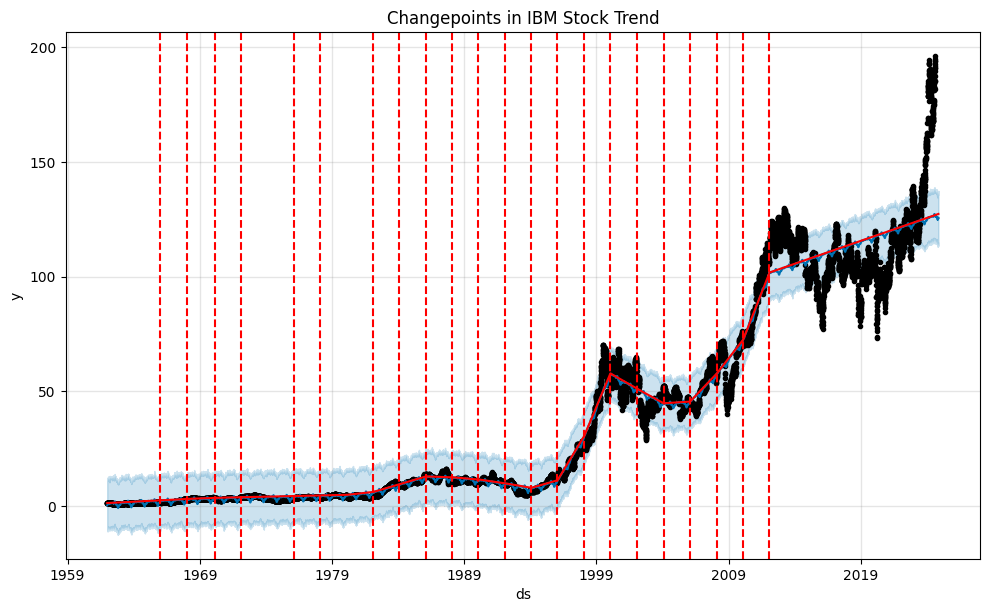

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig3 = model.plot(forecast)
add_changepoints_to_plot(fig3.gca(), model, forecast)
plt.title("Changepoints in IBM Stock Trend")
plt.show()


In [ ]:
!pip install prophet openpyxl

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
df = pd.read_csv("IBM.csv")  # Replace if file name differs
df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

df.head()


,ds,y
0,1962-01-02,1.513320
1,1962-01-03,1.526550
2,1962-01-04,1.511336
3,1962-01-05,1.481573
4,1962-01-08,1.453792


##**Train test split for last 90 days**


In [ ]:
train_df = df[:-90]   # All but last 90
test_df = df[-90:]    # Last 90 rows


In [ ]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(train_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptjkncwb7/fl7as05w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptjkncwb7/_ip2oc36.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37240', 'data', 'file=/tmp/tmptjkncwb7/fl7as05w.json', 'init=/tmp/tmptjkncwb7/_ip2oc36.json', 'output', 'file=/tmp/tmptjkncwb7/prophet_model966u6z3m/prophet_model-20250721141209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## **Future forecasting next 90 days**

In [ ]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Slice only the forecasted part
forecast_90 = forecast[['ds', 'yhat']].tail(90).reset_index(drop=True)
forecast_90['actual'] = test_df['y'].reset_index(drop=True)


##**Evaluate accuracy**


In [ ]:
rmse_prophet = np.sqrt(mean_squared_error(forecast_90['actual'], forecast_90['yhat']))
mae_prophet = mean_absolute_error(forecast_90['actual'], forecast_90['yhat'])

print("RMSE:", rmse_prophet)
print("MAE:", mae_phrophet)


RMSE: 56.1348807630205
MAE: 55.30222508581538


##**Visualize Future vs Actual**


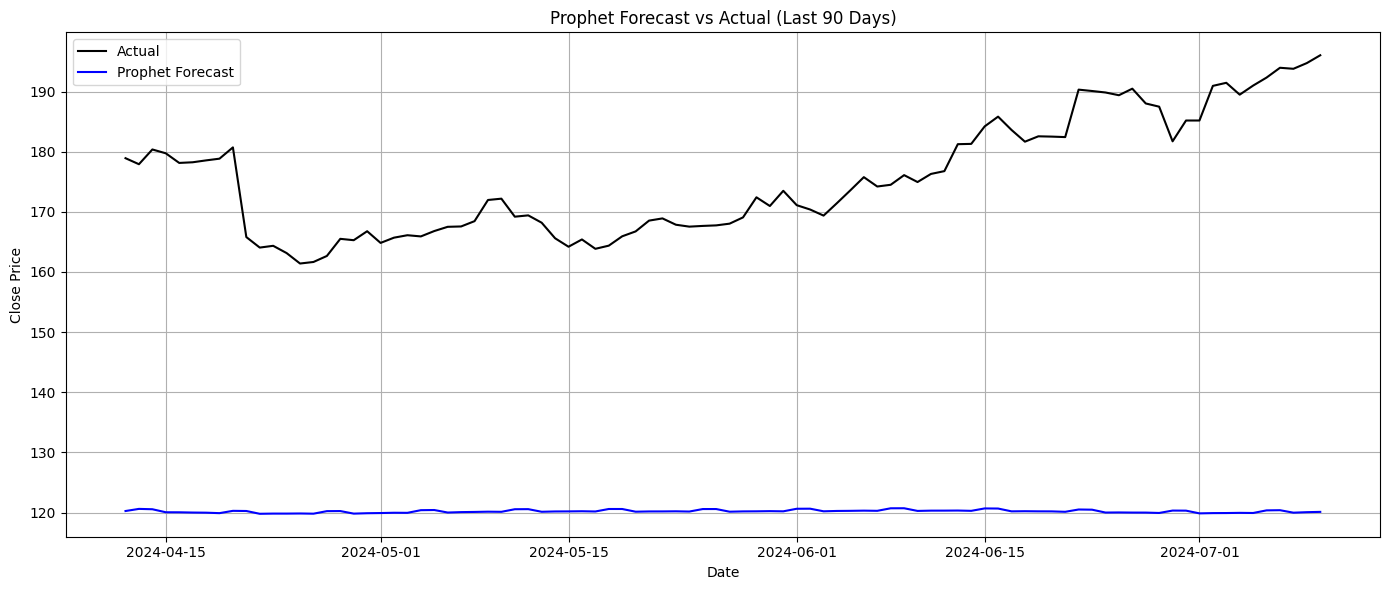

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(forecast_90['ds'], forecast_90['actual'], label='Actual', color='black')
plt.plot(forecast_90['ds'], forecast_90['yhat'], label='Prophet Forecast', color='blue')
plt.title("Prophet Forecast vs Actual (Last 90 Days)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#**Compare Prophet performance with ARIMA.**

In [ ]:
!pip install prophet openpyxl pmdarima


In [ ]:
from google.colab import files
import pandas as pd

# Upload your file
#uploaded = files.upload()

# Load Excel data
df = pd.read_csv("IBM.csv")
df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

# Train-test split: last 90 days as test
train_df = df[:-90]
test_df = df[-90:]


##**Train and forecast with Prophet**

In [ ]:
from prophet import Prophet

# Initialize and train model
prophet_model = Prophet()
prophet_model.fit(train_df)

# Forecast next 90 days
future = prophet_model.make_future_dataframe(periods=90)
forecast = prophet_model.predict(future)

# Extract Prophet predictions
prophet_pred = forecast[['ds', 'yhat']].tail(90).reset_index(drop=True)
prophet_pred['actual'] = test_df['y'].reset_index(drop=True)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptjkncwb7/oos0wkw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptjkncwb7/uf2nfqab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98663', 'data', 'file=/tmp/tmptjkncwb7/oos0wkw9.json', 'init=/tmp/tmptjkncwb7/uf2nfqab.json', 'output', 'file=/tmp/tmptjkncwb7/prophet_modelwrayoibu/prophet_model-20250721141318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##**Train and forecast with ARIMA**


In [ ]:
!pip install statsmodels


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from google.colab import files

# Upload your file
#uploaded = files.upload()

# Load Excel data
df = pd.read_csv("IBM.csv")
df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

# Train-test split: last 90 days as test
train_df = df[:-90]
test_df = df[-90:]

# Use only y-values for ARIMA
train_y = train_df['y']
test_y = test_df['y']

# Fit ARIMA model (example order, you can tune)
arima = ARIMA(train_y, order=(5,1,0))
arima_result = arima.fit()

# Forecast 90 steps
arima_forecast = arima_result.forecast(steps=90)

# Store ARIMA results
arima_pred = pd.DataFrame({
    'ds': test_df['ds'].values,
    'yhat': arima_forecast,
    'actual': test_y.values
})

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE and MAE
rmse_arima = np.sqrt(mean_squared_error(arima_pred['actual'], arima_pred['yhat']))
mae_arima = mean_absolute_error(arima_pred['actual'], arima_pred['yhat'])

print(f"ARIMA Model Evaluation:")
print(f"RMSE: {rmse_arima:.2f}")
print(f"MAE : {mae_arima:.2f}")


ARIMA Model Evaluation:
RMSE: 11.89
MAE : 10.34


##**Comparing ARIMA vs prophet**

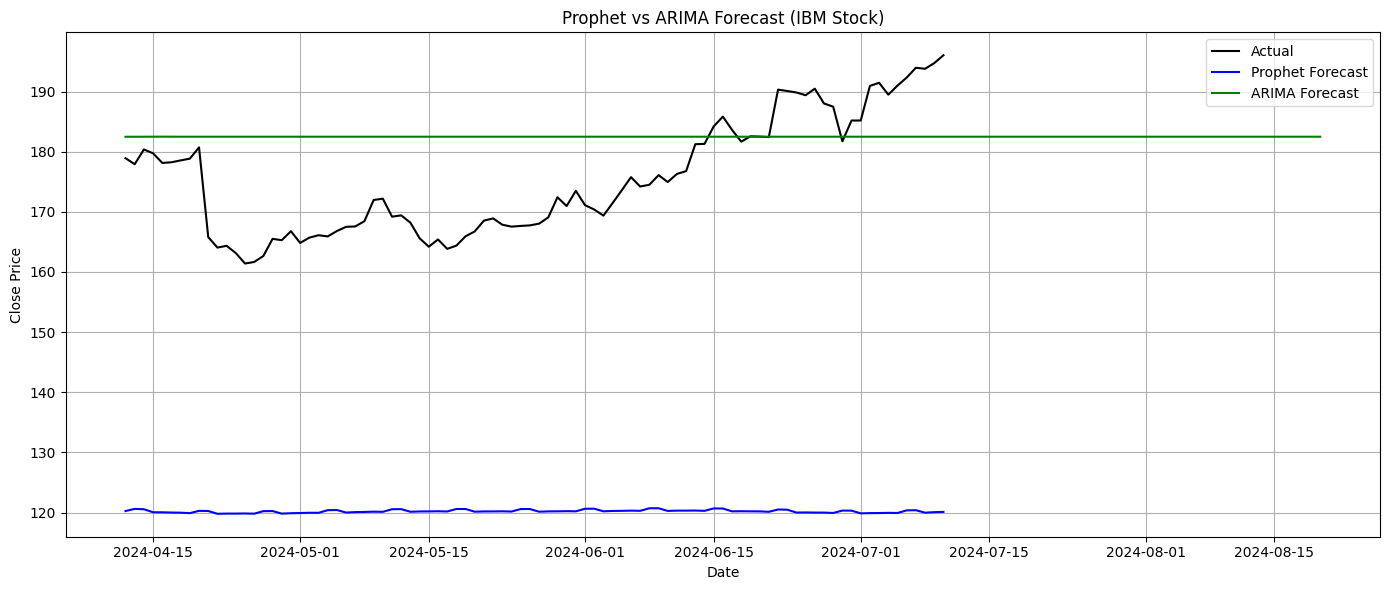

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Actual values
plt.plot(prophet_pred['ds'], prophet_pred['actual'], label='Actual', color='black')

# Prophet forecast
plt.plot(prophet_pred['ds'], prophet_pred['yhat'], label='Prophet Forecast', color='blue')

# ARIMA forecast
plt.plot(arima_pred['ds'], arima_pred['yhat'], label='ARIMA Forecast', color='green')

plt.title("Prophet vs ARIMA Forecast (IBM Stock)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 0.0028 - val_loss: 7.8004e-04
Epoch 2/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - loss: 1.6429e-04 - val_loss: 2.3648e-04
Epoch 3/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 1.3128e-04 - val_loss: 3.4634e-04
Epoch 4/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 1.2798e-04 - val_loss: 2.0220e-04
Epoch 5/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 1.1296e-04 - val_loss: 2.9379e-04
Epoch 6/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 9.8721e-05 - val_loss: 1.6910e-04
Epoch 7/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 9.5918e-05 - val_loss: 1.8607e-04
Epoch 8/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 9.1962e-05 - val_loss: 3.0631e-04
Epoch 9/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 9.2620e-05 - val_loss: 1.5105e-04
Epoch 10/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 1.0170e-04 - val_loss: 1.9538e-04
Epoch 11/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 16

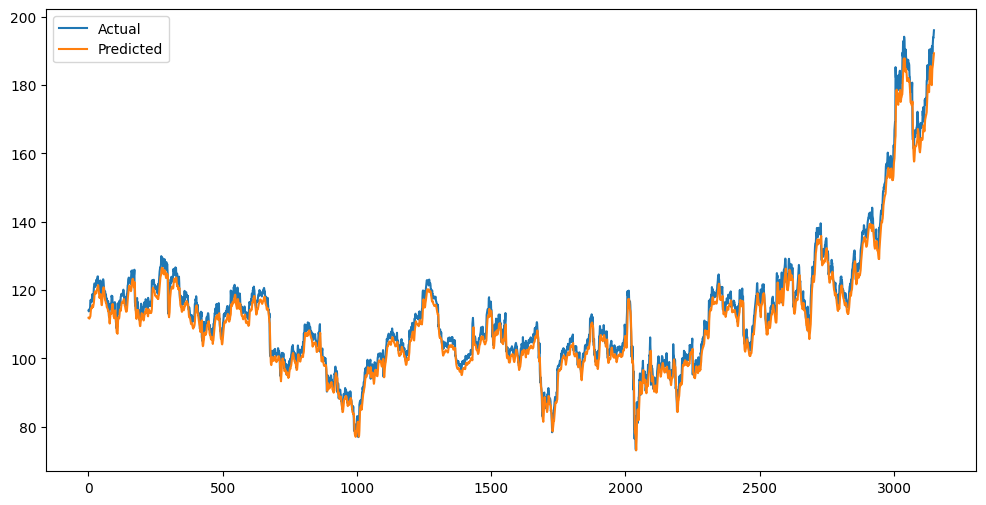

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

df = pd.read_csv("IBM.csv")
series = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 20
X, y = create_dataset(series_scaled, window_size)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(window_size, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Flatten arrays for metric calculations
y_test_flat = y_test_inv.flatten()
y_pred_flat = y_pred_inv.flatten()

# Calculate RMSE and MAE
rmse_lstm = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
mae_lstm = mean_absolute_error(y_test_flat, y_pred_flat)

print(f"LSTM RMSE: {rmse_lstm:.4f}")
print(f"LSTM MAE: {mae_lstm:.4f}")


LSTM RMSE: 2.9966
LSTM MAE: 2.5308


In [ ]:
results = {
    "Model": ["SARIMA", "Prophet","ARIMA","LSTM"],
    "RMSE": [rmse_sarimax,rmse_prophet,rmse_arima,rmse_lstm],
    "MAE": [mae_sarimax,mae_prophet,mae_arima,mae_lstm]

}

comparison_df = pd.DataFrame(results)
print(comparison_df)


     Model       RMSE        MAE
0   SARIMA  12.497328  10.680766
1  Prophet  56.134881  55.302225
2    ARIMA  11.894566  10.342245
3     LSTM   2.996640   2.530764


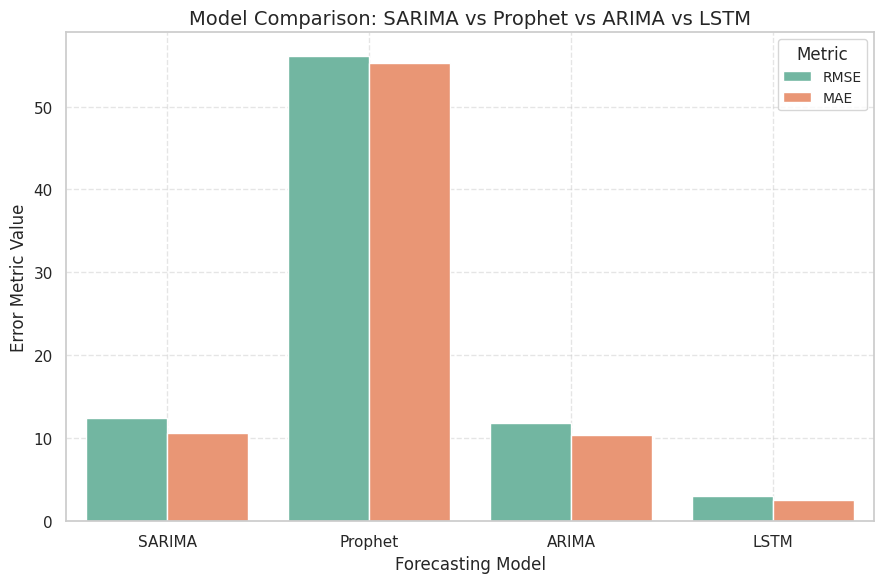

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Melt the DataFrame to long format for seaborn
comparison_melted = pd.melt(comparison_df, id_vars="Model", var_name="Metric", value_name="Value")

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))
sns.barplot(x="Model", y="Value", hue="Metric", data=comparison_melted, palette="Set2")

# Customize plot
plt.title("Model Comparison: SARIMA vs Prophet vs ARIMA vs LSTM", fontsize=14)
plt.ylabel("Error Metric Value", fontsize=12)
plt.xlabel("Forecasting Model", fontsize=12)
plt.legend(title="Metric", fontsize=10)
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()